In [18]:
from db_utils import RDSDatabaseConnector, DataTransform, DataFrameInfo, Plotter, DataFrameTransform as dft, get_credentials

import seaborn as sns
import numpy as np
import pandas as pd
import yaml
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sqlalchemy import create_engine

from scipy.stats import yeojohnson

creds = get_credentials('credentials.yaml')
RDSDBConn = RDSDatabaseConnector(creds)
engine = RDSDBConn.create_conn()
df = RDSDBConn.get_dataframe(engine)
# RDSDBConn.save_to_file(df)

In [19]:
# Data Cleanup
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))
print(df['term'])

id
38676116    36.0
38656203    36.0
38656154    36.0
38656128    36.0
38656121    36.0
            ... 
76597       36.0
142608      36.0
117045      36.0
88854       36.0
72323       36.0
Name: term, Length: 54231, dtype: float64


In [20]:
dfInfo = DataFrameInfo()
dfInfo.describe(df)
dfInfo.get_stats(df)
dfInfo.count_distinct(df)
dfInfo.print_shape(df)
dfInfo.count_null(df)

Column 'member_id' has data type int64
Column 'loan_amount' has data type int64
Column 'funded_amount' has data type float64
Column 'funded_amount_inv' has data type float64
Column 'term' has data type float64
Column 'int_rate' has data type float64
Column 'instalment' has data type float64
Column 'grade' has data type object
Column 'sub_grade' has data type object
Column 'employment_length' has data type object
Column 'home_ownership' has data type object
Column 'annual_inc' has data type float64
Column 'verification_status' has data type object
Column 'issue_date' has data type object
Column 'loan_status' has data type object
Column 'payment_plan' has data type object
Column 'purpose' has data type object
Column 'dti' has data type float64
Column 'delinq_2yrs' has data type int64
Column 'earliest_credit_line' has data type object
Column 'inq_last_6mths' has data type int64
Column 'mths_since_last_delinq' has data type float64
Column 'mths_since_last_record' has data type float64
Colu

In [21]:
# Handling Null Values
# Dropping columns. Personally, would keep 'next_payment_date', but Project
# instructions require there to be no null values at the end
df = df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'next_payment_date'], axis=1)
# Imputation
df = dft.drop_null_rows(df, ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med'])
df = dft.impute_with_mode(df, 'term')
df = dft.impute_with_mode(df, 'employment_length')
df = dft.impute_with_mean(df, 'funded_amount')
df = dft.impute_with_mean(df, 'int_rate')

# Verify that no more null values are required
dfInfo.describe(df)
dfInfo.get_stats(df)
dfInfo.count_distinct(df)
dfInfo.print_shape(df)
dfInfo.count_null(df)

Column 'member_id' has data type int64
Column 'loan_amount' has data type int64
Column 'funded_amount' has data type float64
Column 'funded_amount_inv' has data type float64
Column 'term' has data type float64
Column 'int_rate' has data type float64
Column 'instalment' has data type float64
Column 'grade' has data type object
Column 'sub_grade' has data type object
Column 'employment_length' has data type object
Column 'home_ownership' has data type object
Column 'annual_inc' has data type float64
Column 'verification_status' has data type object
Column 'issue_date' has data type object
Column 'loan_status' has data type object
Column 'payment_plan' has data type object
Column 'purpose' has data type object
Column 'dti' has data type float64
Column 'delinq_2yrs' has data type int64
Column 'earliest_credit_line' has data type object
Column 'inq_last_6mths' has data type int64
Column 'open_accounts' has data type int64
Column 'total_accounts' has data type int64
Column 'out_prncp' has da

In [22]:
dfInfo.get_skews(df)

Skew of loan_amount is 0.8043121863503576
Skew of funded_amount is 0.8445441222180953
Skew of funded_amount_inv is 0.8142509295608985
Skew of term is 1.1463315618353964
Skew of int_rate is 0.4326861949190135
Skew of instalment is 0.9961503404396858
Skew of annual_inc is 8.73573692583551
Skew of dti is 0.18901977139121579
Skew of delinq_2yrs is 5.318817917464191
Skew of inq_last_6mths is 3.243836167526465
Skew of open_accounts is 1.0594931166880517
Skew of total_accounts is 0.7800832932375489
Skew of out_prncp is 2.352525970614482
Skew of out_prncp_inv is 2.3529464346145614
Skew of total_payment is 1.2692662197762663
Skew of total_payment_inv is 1.2584742300393752
Skew of total_rec_prncp is 1.262007269838639
Skew of total_rec_int is 2.203625284669197
Skew of total_rec_late_fee is 13.258471830549329
Skew of recoveries is 14.382675406825468
Skew of collection_recovery_fee is 27.794716127396722
Skew of last_payment_amount is 2.496078600255455
Skew of collections_12_mths_ex_med is 20.298063

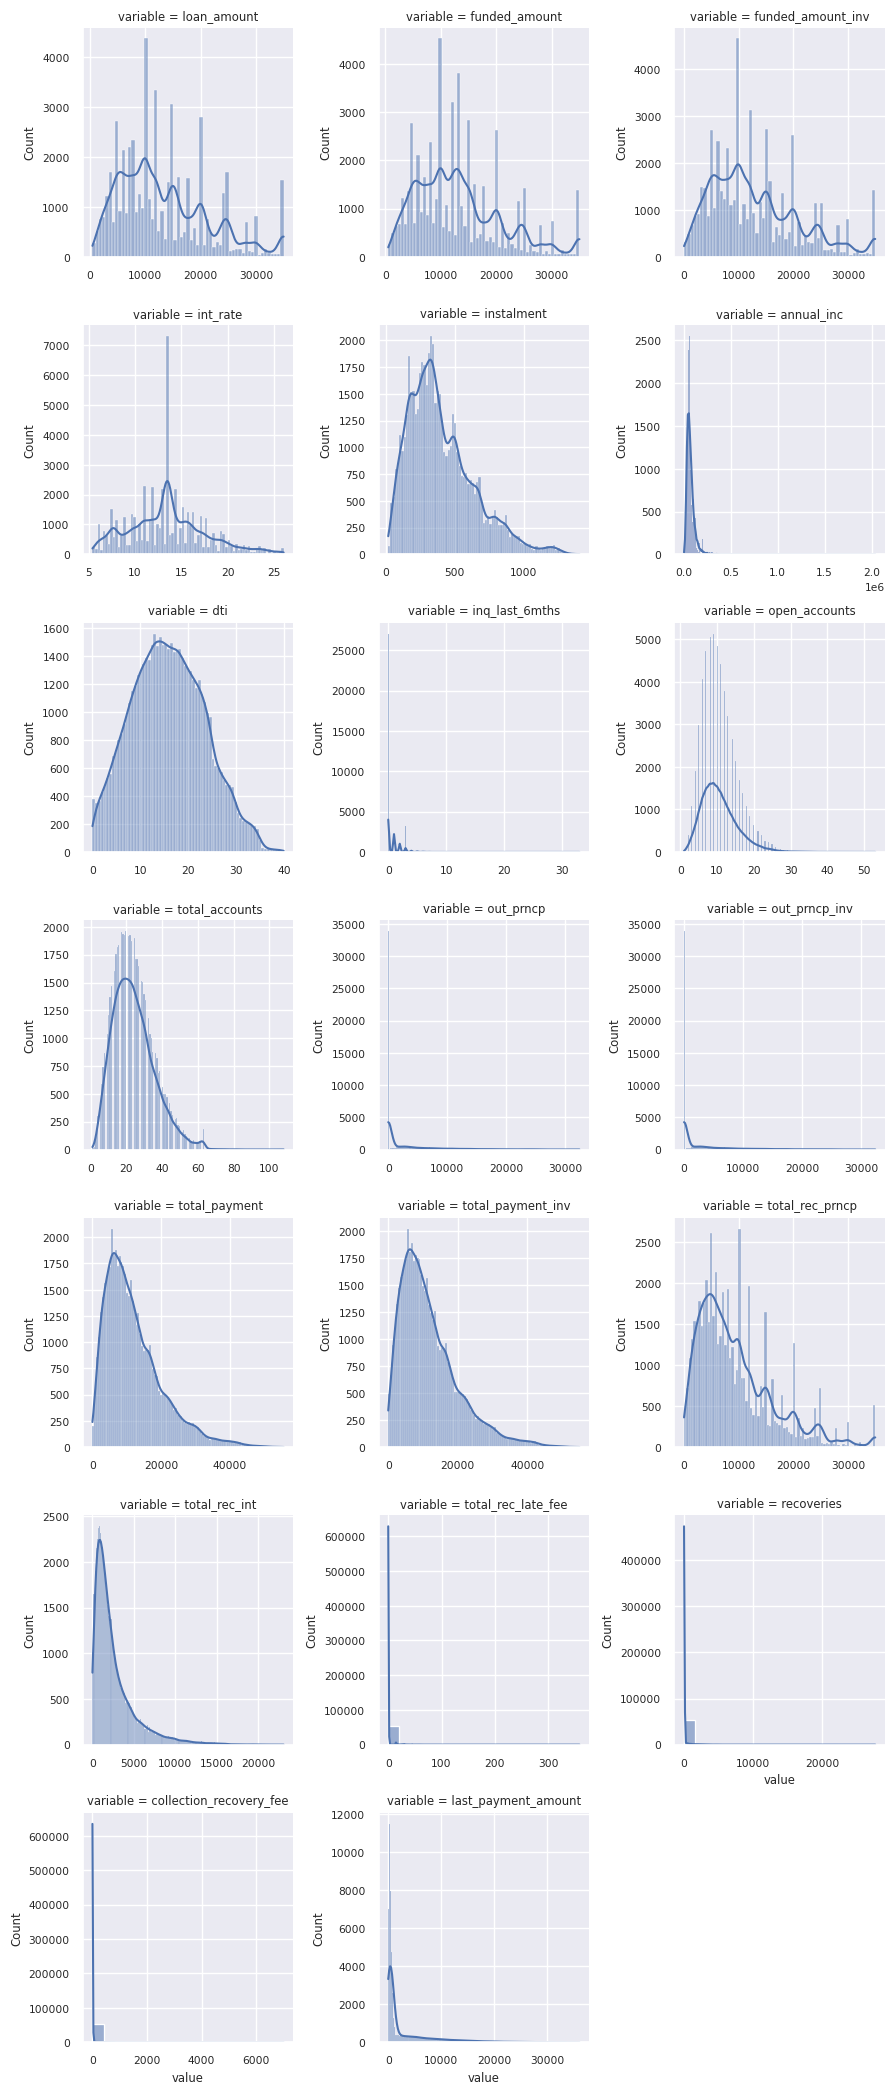

In [23]:
numeric_columns = [
    'loan_amount',
    'funded_amount',
    'funded_amount_inv',
    'int_rate',
    'instalment',
    'annual_inc',
    'dti',
    'inq_last_6mths',
    'open_accounts',
    'total_accounts',
    'out_prncp',
    'out_prncp_inv',
    'total_payment',
    'total_payment_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_payment_amount'
]

Plotter.show_all_skews(df, numeric_columns)

Skew of loan_amount is 0.8043121863503576
Skew of funded_amount is 0.8445441222180953
Skew of funded_amount_inv is 0.8142509295608985
Skew of term is 1.1463315618353964
Skew of int_rate is 0.4326861949190135
Skew of instalment is 0.9961503404396858
Skew of annual_inc is 0.8503077557798224
Skew of dti is 0.18901977139121579
Skew of delinq_2yrs is 5.318817917464191
Skew of inq_last_6mths is 0.9546580529827302
Skew of open_accounts is 0.051179789561888574
Skew of total_accounts is 0.7800832932375489
Skew of out_prncp is 0.7890535122304929
Skew of out_prncp_inv is 0.7892745398927861
Skew of total_payment is -0.11745162785684905
Skew of total_payment_inv is -0.3921634619291914
Skew of total_rec_prncp is -0.15484824814155762
Skew of total_rec_int is 0.26197417479247165
Skew of total_rec_late_fee is 5.885765893600362
Skew of recoveries is 4.470931367544948
Skew of collection_recovery_fee is 6.845608811610118
Skew of last_payment_amount is 0.9297979334444285
Skew of collections_12_mths_ex_med 

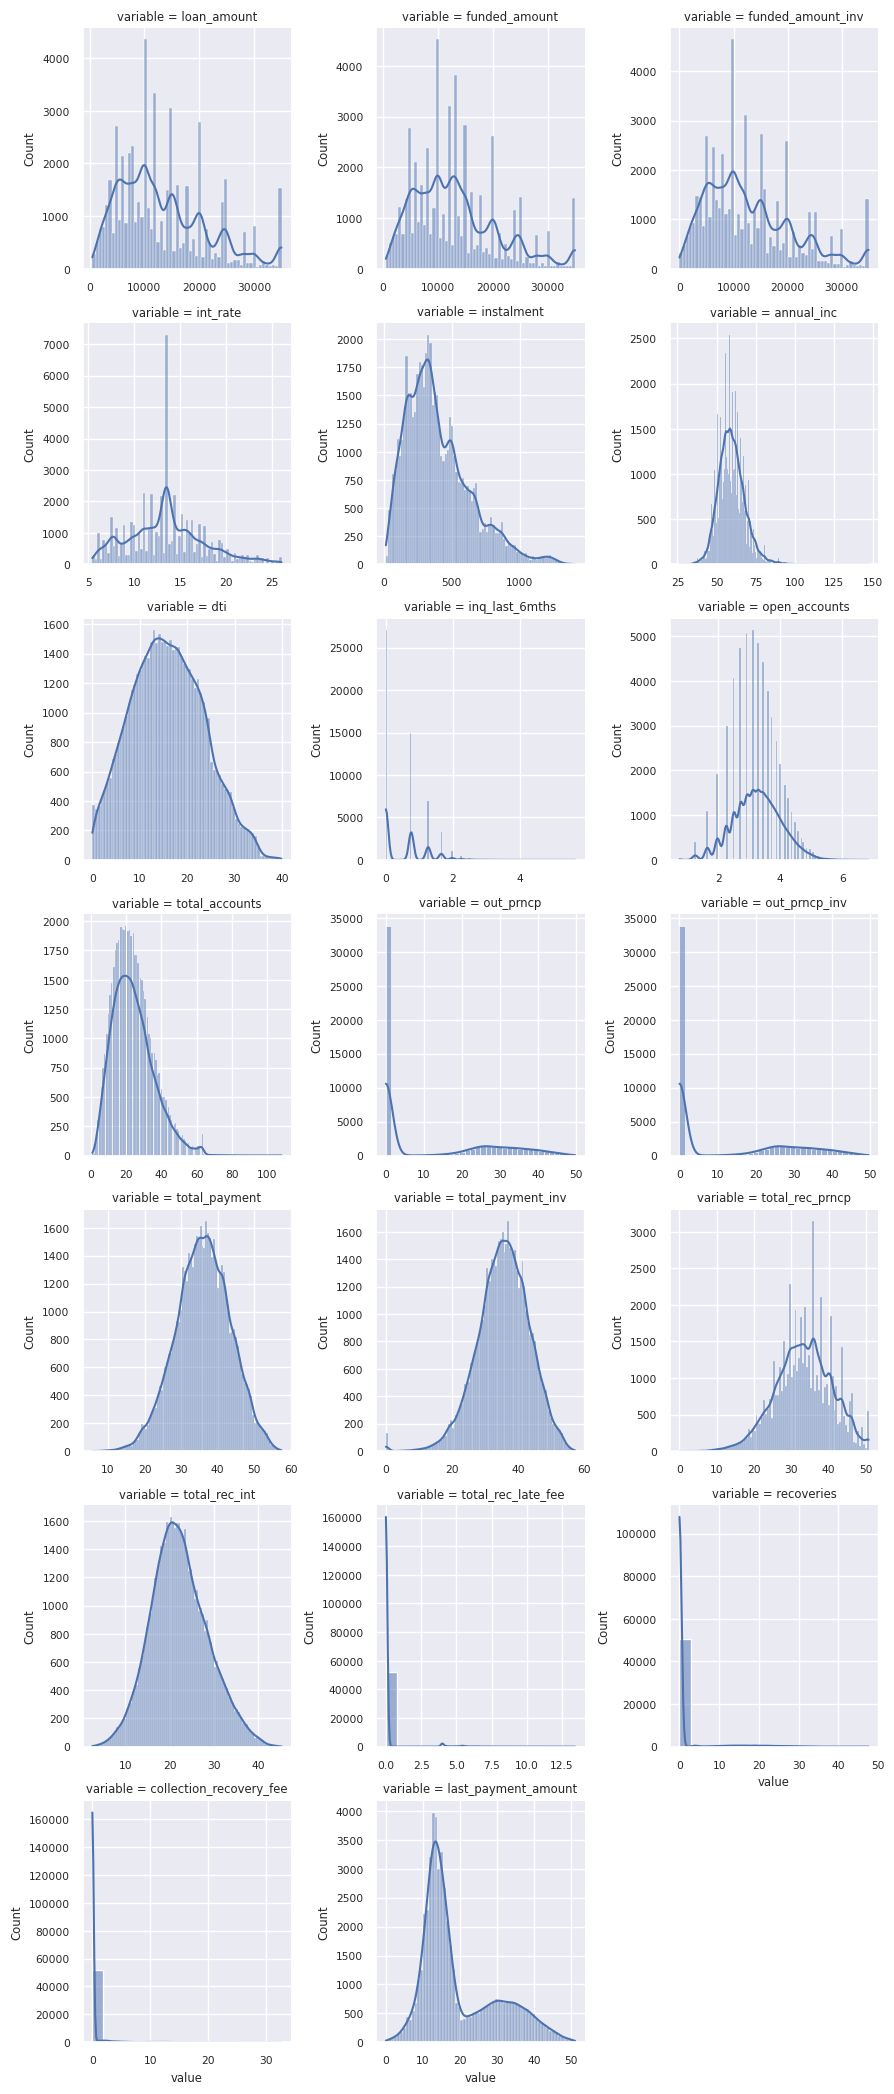

In [24]:
for c in numeric_columns:
    col_skew = df[c].skew()
    if col_skew > 1 or col_skew < -1:
        df[c] = dft.box_cox_transform(df, c)

# df = dft.box_cox_transform(df)
dfInfo.get_skews(df)
Plotter.show_all_skews(df, numeric_columns)

In [25]:
# Performing analysis of numerical data to detect outliers
# Have to use statistical methods, as generating plots takes an indefinite amount of time
for column in numeric_columns:
    analysis_df = dfInfo.get_z_score(df, column)

    outliers_df = dfInfo.get_interquartile_range(analysis_df, column)

Q1 (25th percentile): 7000.0
Q3 (75th percentile): 18075.0
IQR: 11075.0
Outliers:
          loan_amount  z_scores
id                             
38655834        35000  2.679773
38655417        35000  2.679773
38655413        35000  2.679773
38654574        35000  2.679773
38635990        35000  2.679773
...               ...       ...
674846          35000  2.679773
674448          35000  2.679773
672680          35000  2.679773
670409          35000  2.679773
632417          35000  2.679773

[1496 rows x 2 columns]
Q1 (25th percentile): 7250.0
Q3 (75th percentile): 18000.0
IQR: 10750.0
Outliers:
          funded_amount  z_scores
id                               
38655834        35000.0   2.79233
38655413        35000.0   2.79233
38654574        35000.0   2.79233
38634902        35000.0   2.79233
38634766        35000.0   2.79233
...                 ...       ...
674846          35000.0   2.79233
674448          35000.0   2.79233
672680          35000.0   2.79233
670409          35000

/home/will/exploratory-data-analysis---customer-loans-in-finance521/db_utils.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/will/exploratory-data-analysis---customer-loans-in-finance521/db_utils.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/will/exploratory-data-analysis---customer-loans-in-finance521/db_utils.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [26]:
for column in numeric_columns:
    df = dft.drop_outliers(df, column)
    dfInfo.print_shape(df)

The dataframe has 54100 rows and 38 columns
The dataframe has 54100 rows and 38 columns
The dataframe has 54100 rows and 38 columns
The dataframe has 54078 rows and 38 columns
The dataframe has 53407 rows and 38 columns
The dataframe has 52946 rows and 38 columns
The dataframe has 52913 rows and 38 columns
The dataframe has 52481 rows and 38 columns
The dataframe has 52338 rows and 38 columns
The dataframe has 51887 rows and 38 columns
The dataframe has 51887 rows and 38 columns
The dataframe has 51887 rows and 38 columns
The dataframe has 51788 rows and 38 columns
The dataframe has 51598 rows and 38 columns
The dataframe has 51516 rows and 38 columns
The dataframe has 51425 rows and 38 columns
The dataframe has 49833 rows and 38 columns
The dataframe has 47970 rows and 38 columns
The dataframe has 47397 rows and 38 columns
The dataframe has 47397 rows and 38 columns


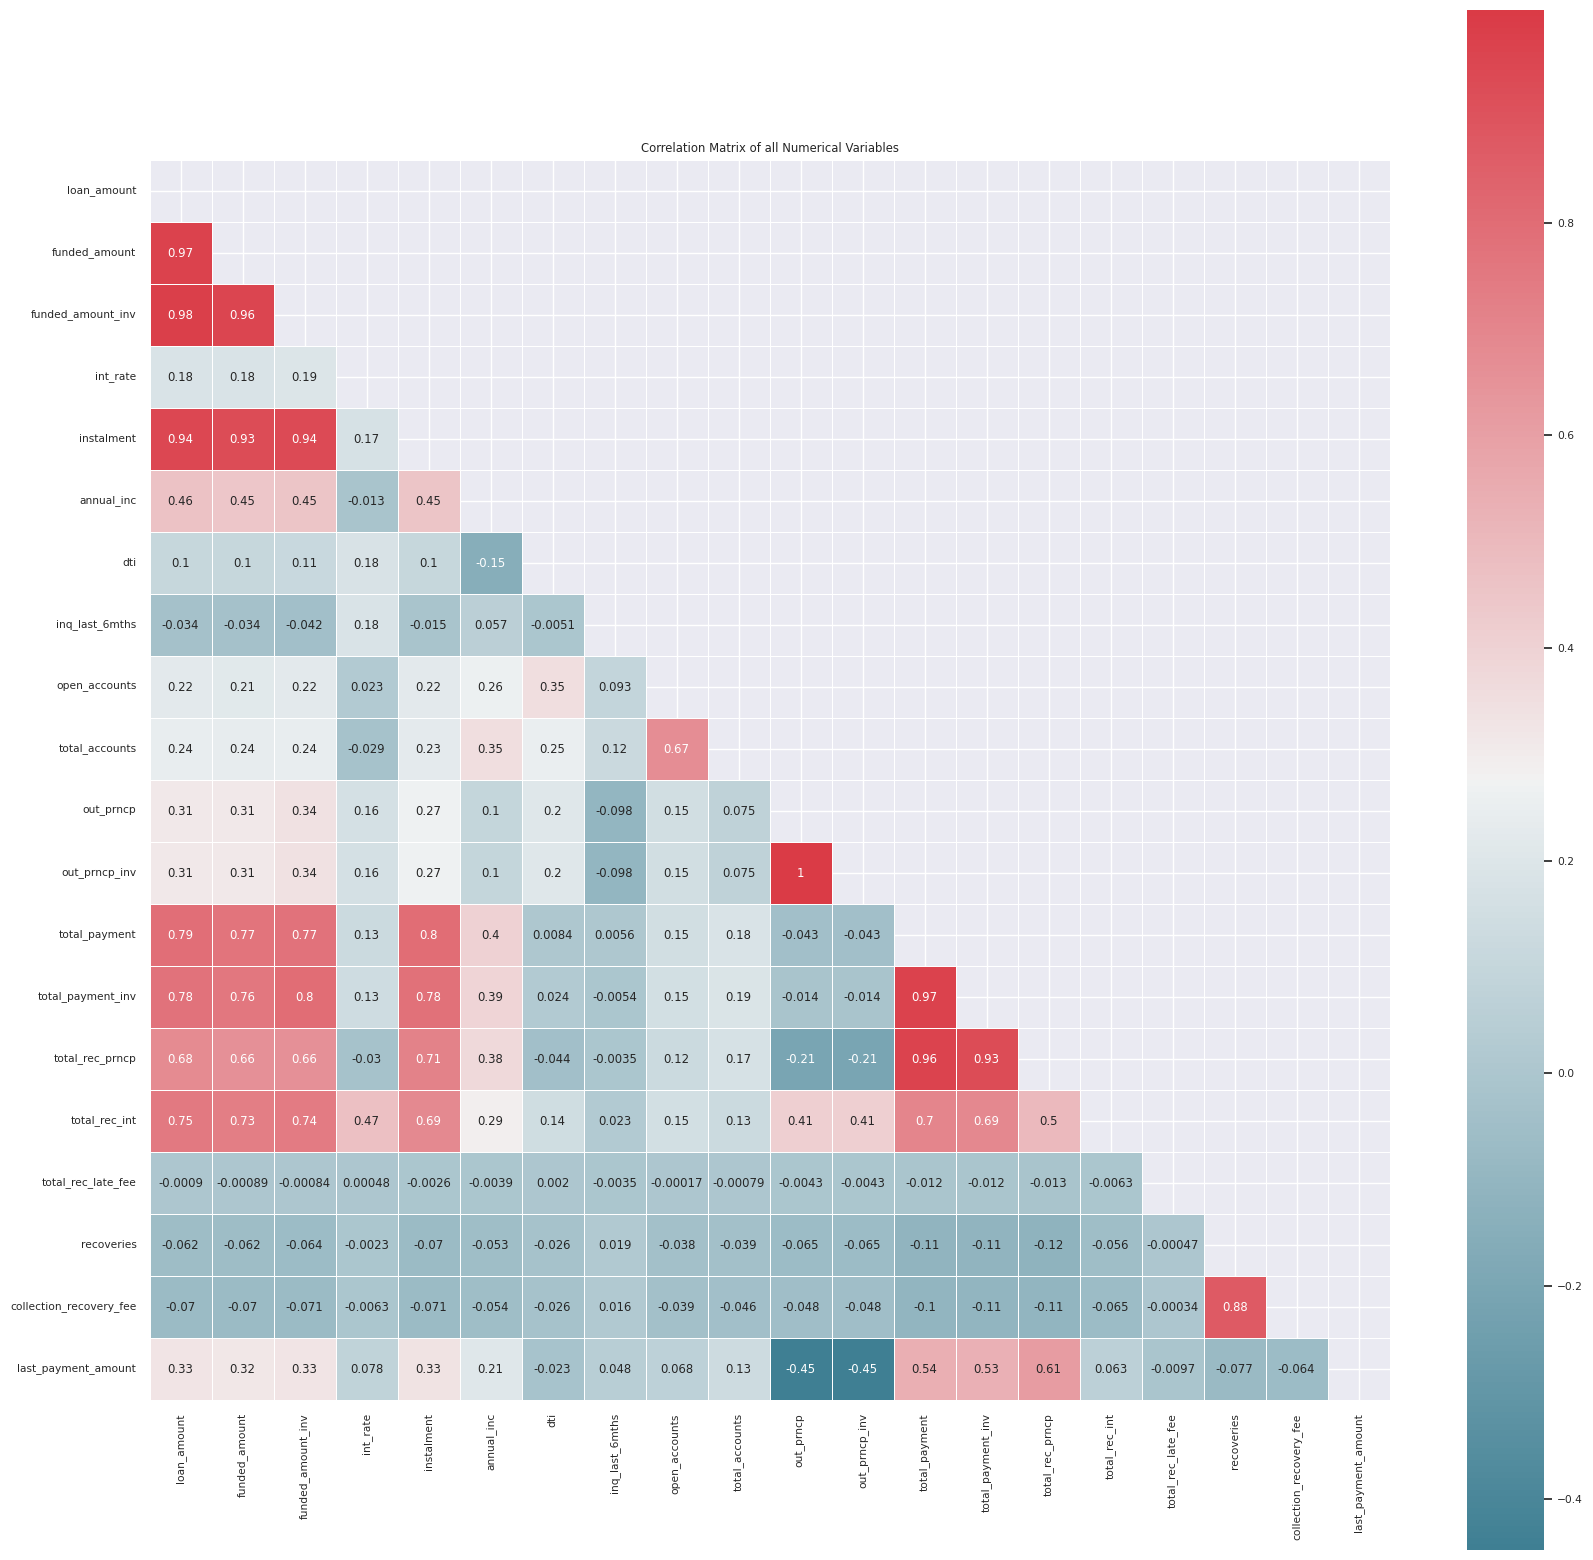

In [27]:
# Compute the correlation matrix
corr = df[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()



In [28]:
# Drop the selected columns
df.drop(['out_prncp_inv', 'total_payment_inv'], axis=1, inplace=True)

Task 1: Current state of the loans

In [29]:
# Get total amount of loans recovered
recovered_total = df['total_payment'].sum()
print(recovered_total)

# Calculate recoveries as a percentage of investor funding
total_funding_inv = df['funded_amount_inv'].sum()
rec_vs_funding_inv = (recovered_total / total_funding_inv) * 100
print(rec_vs_funding_inv)

# Visualise the above calculations
fig = px.pie(values=[recovered_total, total_funding_inv-recovered_total], names=['Recovered', 'Unrecovered'], title='Percentage of Total Funding Recovered', width=600)
fig.show()

1716624.848798884
0.2852826722987937


In [30]:
# Calculate recoveries as a percentage of total funding
total_funding = df['funded_amount'].sum()
rec_vs_funding = (recovered_total / total_funding) * 100
print(rec_vs_funding)

# Visualise the above calculations
fig = px.pie(values=[recovered_total, total_funding_inv-recovered_total], names=['Recovered', 'Unrecovered'], title='Percentage of Investor Funding Recovered', width=600)
fig.show()

0.2801782840150634


In [31]:
# Calculate projected recoveries over next 6 months
projected_recoveries = (df['instalment'].sum() * 6) + recovered_total
print(projected_recoveries)
# Calculate recoveries as a percentage of total funding
proj_rec_vs_funding = (projected_recoveries / total_funding) * 100
print(proj_rec_vs_funding)

# Visualise the above calculations
fig = px.pie(values=[proj_rec_vs_funding, total_funding_inv-projected_recoveries], names=['Recovered', 'Unrecovered'], title="Projected Recovery in 6 months' Time", width=600)
fig.show()

112128853.92879888
18.301069045067287


Task 2: Calculating loss

In [32]:
# Get percentage of loans that were charged off
charged_off_count = len(df[df['loan_status'].str.contains('Charged Off')])
loans_count = df.shape[0]
charged_off_count_pct = float(charged_off_count / loans_count) * 100
print(f"{charged_off_count_pct:.2f}% of all historical loans ({charged_off_count} / {loans_count}) have been charged off.")

# Get percentage of funding given to loans that were then charged off
charged_off_funding = df.loc[df['loan_status'].str.contains('Charged Off'), 'funded_amount'].sum()

funding_charged_off_pct = (charged_off_funding / total_funding) * 100
print(f"{funding_charged_off_pct:.2f}% of all historical funding has been charged off.")

# Get total amount paid toward charged-off loans
total_paid_charged_off = df.loc[df['loan_status'].str.contains('Charged Off'), 'total_payment'].sum()
mean_paid_charged_off = df.loc[df['loan_status'].str.contains('Charged Off'), 'total_payment'].mean()
median_paid_charged_off = df.loc[df['loan_status'].str.contains('Charged Off'), 'total_payment'].median()
print("Amount paid back on charged-off loans:")
print(f"\t Total: ${total_paid_charged_off}")
print(f"\t Mean: ${mean_paid_charged_off}")
print(f"\t Median: ${median_paid_charged_off}")


4.73% of all historical loans (2242 / 47397) have been charged off.
4.71% of all historical funding has been charged off.
Amount paid back on charged-off loans:
	 Total: $64417.34675518761
	 Mean: $28.73209043496325
	 Median: $28.841756800826776


Task 3: Calculating projected loss

In [33]:
# Make dataframe of only charged-off loans
charged_off_df = df.loc[df['loan_status'].str.contains('Charged Off')]

projected_losses = []

# Iterate through each month of the remaining terms,
# and calculate loss for that month
while(charged_off_df['term'].sum() != 0):
    monthly_total = charged_off_df.loc[charged_off_df['term'] > 0, 'instalment'].sum()
    
    projected_losses.append(monthly_total)
    
    charged_off_df['term'] = charged_off_df['term'].apply(lambda x: x - 1 if x > 0 else x)

# Visualise loss data over each month
fig = go.Figure(data=[go.Histogram(x=list(range(1, len(projected_losses)+1)), y=projected_losses, cumulative_enabled=True)])
fig.show()

/tmp/ipykernel_660/702559939.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Task 4: Possible loss

In [36]:
# Calculate what percentage of users are behind with loan repayments
late_df = df.loc[df['loan_status'].str.contains('Late')]
late_users_count = late_df.shape[0]
late_users_pct = (late_users_count / loans_count) * 100
print(f"{late_users_pct:.2f}% of users are behind on loan repayments")

# Calculate total number of users that are behind with loan repayments
print(f"{late_users_count} users are behind on loan repayments")

# Calculate projected loss from charging off loans
total_repaid = late_df['total_payment'].sum()
total_loaned = late_df['funded_amount'].sum()
total_outstanding = total_loaned = total_repaid
print(f"Charging off all late loans would result in a loss of ${total_outstanding:.2f}")

# Calculate projected loss from allowing loans to finish their full terms
late_df['full_term_loss'] = (late_df['loan_amount'] * ((late_df['int_rate'] / 100 ) + 1)) - (late_df['loan_amount'] - late_df['out_prncp'] + late_df['total_rec_int'])
total_full_term_loss = late_df['full_term_loss'].sum()
print(f"Allowing the loans to continue unpaid for the full term would result in a loss of ${total_full_term_loss:.2f}")

# Project the percentage of expected revenue represented by 
# both Late->Charged Off loans, and existing Charged Off loans
total_chargedoff_proj_loss = total_outstanding + total_paid_charged_off
chargedoff_proj_pct = (total_chargedoff_proj_loss / recovered_total)* 100
print(f"Combined charged-off loss would be ${total_chargedoff_proj_loss:.2f}")
print(f"This represents {chargedoff_proj_pct:.2f}% of the total expected revenue.")


1.16% of users are behind on loan repayments
551 users are behind on loan repayments
Charging off all late loans would result in a loss of $18694.03
Allowing the loans to continue unpaid for the full term would result in a loss of $1275906.70
Combined charged-off loss would be $83111.38
This represents 4.84% of the total expected revenue.


/tmp/ipykernel_660/1112422528.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Task 5: Indicators of loss